<a href="https://colab.research.google.com/github/Hyebeen-101903/AI_Programing/blob/main/%EC%9D%B8%EC%A7%80%ED%94%84_6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quite torchision


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [ ]:
! pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!pip install torchsummary  #모듈의 정보를 보이게 함

In [ ]:
import numpy as np
import torch

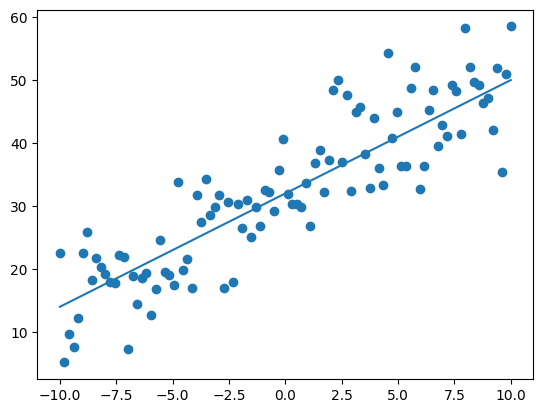

In [ ]:
x = np.linspace(-10,10,100)
y_label = 1.8 * x+32.
y = y_label + 5. * np.random.randn((100))

import matplotlib.pyplot as plt

plt.plot(x,y_label)
plt.scatter(x,y)

In [ ]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

print(x.shape)
print(y.shape)

torch.Size([100])
torch.Size([100])


In [ ]:
from torch.nn import Module, init, Linear , Parameter, ReLU

In [ ]:
Linear.mro() #linear의 계층 구조를 보여줌

[torch.nn.modules.linear.Linear, torch.nn.modules.module.Module, object]

https://ds31x.tistory.com/236 init_으로 하는 것을 권함

In [ ]:
class DsLinearModel (Module): #custom module

  def __init__(self,n_in_f, n_out_f ): #인스턴스 메소드일때 self 사용
    super().__init__()

    ##simple approach
    # self.l0 = Linear(n_in_f, n_out_f) #l0는 Linear의 인스턴스 (call of?)
    # self.l1 = Linear(3, n_out_f)


    ##특정 tensor로 초기화하는 방법
    # init_w = torch.ones(1,1)
    # init_b = torch.zeros(1)
    # self.l0 = Linear(n_in_f , n_out_f)
    # self.l0.weight = Parameter(init_w)
    # self.l0.bias = Parameter(init_b)

    self.l0 = Linear(n_in_f,32)
    self.relu0 = ReLU()
    self.l1 = Linear(32,32)
    self.relu1 = ReLU()
    self.l2 = Linear(32, n_out_f)
    with torch.no_grad():
      init.constant_(self.l0.bias,0.)
      init.xavier_uniform_(self.l0.weight)


  def forward(self,x):
    x = self.l0(x)
    x = self.relu0(x)
    x = self.l1(x)
    x = self.relu1(x)
    y = self.l2(x)
    return y


In [ ]:
#Linear에 들어있는 weight와 bias를 알고자 할때
model = DsLinearModel(1,1)
for idx, c in enumerate(model.named_parameters()):
  print(idx, c)

0 ('l0.weight', Parameter containing:
tensor([[ 0.2304],
        [-0.3328],
        [-0.0716],
        [ 0.3805],
        [-0.2063],
        [-0.0167],
        [-0.3073],
        [ 0.2919],
        [-0.4059],
        [-0.1653],
        [ 0.2343],
        [ 0.1961],
        [ 0.1602],
        [ 0.1736],
        [-0.1245],
        [ 0.2348],
        [-0.2761],
        [ 0.2959],
        [ 0.4175],
        [-0.2653],
        [-0.0448],
        [-0.2034],
        [-0.2685],
        [-0.3621],
        [ 0.0941],
        [-0.0516],
        [-0.3144],
        [-0.2224],
        [ 0.0567],
        [ 0.2587],
        [-0.2019],
        [-0.1162]], requires_grad=True))
1 ('l0.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))
2 ('l1.weight', Parameter containing:
tensor([[ 0.1506, -0.0292, -0.1716,  ...,  0.1278, -0.0285,  0.0520],
        [ 0.0408,  0.1

In [ ]:
for idx, cl in enumerate(model.named_children()):
  print(idx, cl)

0 ('l0', Linear(in_features=1, out_features=32, bias=True))
1 ('relu0', ReLU())
2 ('l1', Linear(in_features=32, out_features=32, bias=True))
3 ('relu1', ReLU())
4 ('l2', Linear(in_features=32, out_features=1, bias=True))


In [ ]:
for idx, modu in enumerate(model.modules()):
#for idx modu in enumerate(model.named_modules())
  print (idx, modu)

0 DsLinearModel(
  (l0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (l1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=32, out_features=1, bias=True)
)
1 Linear(in_features=1, out_features=32, bias=True)
2 ReLU()
3 Linear(in_features=32, out_features=32, bias=True)
4 ReLU()
5 Linear(in_features=32, out_features=1, bias=True)


In [ ]:
x = x.reshape(-1,1)
x.shape

torch.Size([100, 1])

In [ ]:
y_pred = model(x)

In [ ]:
y_pred

tensor([[ 2.2762e-01],
        [ 2.2309e-01],
        [ 2.1856e-01],
        [ 2.1402e-01],
        [ 2.0949e-01],
        [ 2.0496e-01],
        [ 2.0042e-01],
        [ 1.9589e-01],
        [ 1.9136e-01],
        [ 1.8682e-01],
        [ 1.8229e-01],
        [ 1.7775e-01],
        [ 1.7322e-01],
        [ 1.6869e-01],
        [ 1.6415e-01],
        [ 1.5962e-01],
        [ 1.5509e-01],
        [ 1.5055e-01],
        [ 1.4602e-01],
        [ 1.4149e-01],
        [ 1.3695e-01],
        [ 1.3242e-01],
        [ 1.2750e-01],
        [ 1.2241e-01],
        [ 1.1732e-01],
        [ 1.1224e-01],
        [ 1.0715e-01],
        [ 1.0206e-01],
        [ 9.6968e-02],
        [ 9.1879e-02],
        [ 8.6790e-02],
        [ 8.1701e-02],
        [ 7.6612e-02],
        [ 7.1523e-02],
        [ 6.6434e-02],
        [ 6.1345e-02],
        [ 5.6256e-02],
        [ 5.1166e-02],
        [ 4.6077e-02],
        [ 4.1008e-02],
        [ 3.6006e-02],
        [ 2.9400e-02],
        [ 2.2750e-02],
        [ 1

In [ ]:
pred = Linear(1,1)(x)

In [ ]:
pred

tensor([[-1.4085],
        [-1.3845],
        [-1.3604],
        [-1.3363],
        [-1.3122],
        [-1.2881],
        [-1.2640],
        [-1.2399],
        [-1.2158],
        [-1.1917],
        [-1.1676],
        [-1.1435],
        [-1.1194],
        [-1.0953],
        [-1.0712],
        [-1.0471],
        [-1.0230],
        [-0.9989],
        [-0.9748],
        [-0.9508],
        [-0.9267],
        [-0.9026],
        [-0.8785],
        [-0.8544],
        [-0.8303],
        [-0.8062],
        [-0.7821],
        [-0.7580],
        [-0.7339],
        [-0.7098],
        [-0.6857],
        [-0.6616],
        [-0.6375],
        [-0.6134],
        [-0.5893],
        [-0.5652],
        [-0.5412],
        [-0.5171],
        [-0.4930],
        [-0.4689],
        [-0.4448],
        [-0.4207],
        [-0.3966],
        [-0.3725],
        [-0.3484],
        [-0.3243],
        [-0.3002],
        [-0.2761],
        [-0.2520],
        [-0.2279],
        [-0.2038],
        [-0.1797],
        [-0.

In [ ]:
y.shape

torch.Size([100])

In [ ]:
y = y.reshape(-1,1)
y

tensor([[22.4643],
        [ 5.1574],
        [ 9.6317],
        [ 7.5415],
        [12.1551],
        [22.5221],
        [25.8285],
        [18.3280],
        [21.7411],
        [20.3410],
        [19.1268],
        [17.8597],
        [17.8116],
        [22.2666],
        [21.9664],
        [ 7.2473],
        [18.9516],
        [14.4772],
        [18.5625],
        [19.3195],
        [12.7656],
        [16.8678],
        [24.5454],
        [19.4745],
        [19.0061],
        [17.4638],
        [33.8762],
        [19.8098],
        [21.5175],
        [16.9933],
        [31.6924],
        [27.5301],
        [34.3430],
        [28.6416],
        [29.8663],
        [31.8072],
        [17.0065],
        [30.5945],
        [17.8669],
        [30.3761],
        [26.5759],
        [30.9820],
        [25.0590],
        [29.9134],
        [26.8820],
        [32.5395],
        [32.2573],
        [29.1655],
        [35.6542],
        [40.6556],
        [31.8352],
        [30.2716],
        [30.

In [ ]:
pred.shape

torch.Size([100, 1])

In [ ]:
from torch.optim import optimizer #optimizer!! 중요!

##loss

In [ ]:
from torch.nn import MSELoss

loss_fnc = MSELoss()

l = loss_fnc(pred,y)
l

tensor(1200.0139, grad_fn=<MseLossBackward0>)

## training Loop

In [ ]:
p = model(x)

In [ ]:
from torch import optim

def training_loop(
    x, y,
    model,
    lr,
    optimizer , #optimizer type
    n_epochs,
    ):

  model.train()
  #model.eval()
  optimizer = optim.SGD(
      model.parameters(),
  )
  for epoch in range(n_epochs):
    pred = model(x)
    l = loss_fnc(pred, y)

    if torch.isinf(l).any():

      print('Error : diverge!')
      break

    optimizer. zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'Epoch {epoch} : Loss {float(l):0.4f} ')

    return model

In [ ]:
# from torch import optim

# def training_loop(
#     x,y,
#     model,
#     lr,
#     optimizer,
#     n_epochs,
#     ):
#   model.train() #train모델로 설정
#   model.eval()
#   optimizer = optim.SGD(
#         model.parameters(),
# )

#   for epoch in range(n_epochs):
#      print(epoch)
#      pred = model(x)
#      l = loss_fnc(pred,y)
#      if torch.isinif(l).any():
#       print('Error: diverge!')
#       break

#       optimizer.zero_grad()
#       l.backward()
#       optimizer.step()

#       if epoch % 1000 == 0:
#         print(f'Epoch {epoch}: Loss{float(l):0.4f}')
#     return model

In [ ]:
model = training_loop(
    x,y,
    model,
    1e-3,
    optimizer,
    7000,
)

Epoch 0 : Loss 1177.0316 


##train

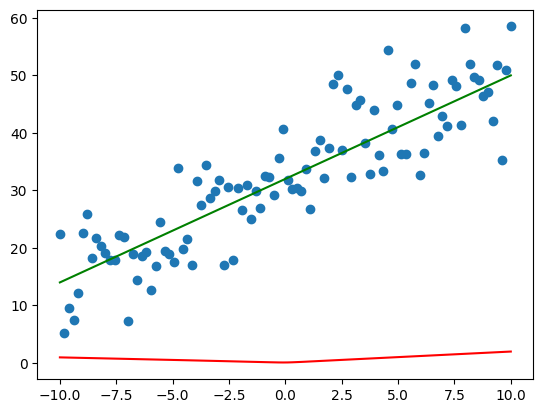

In [ ]:
pred = model(x)

plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(),pred.detach().numpy(),color = 'r')
plt.plot(x.detach().numpy(),y_label , color = 'g')

##evalution

In [ ]:
from torchsummary import summary

summary(model,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
              ReLU-2                   [-1, 32]               0
            Linear-3                   [-1, 32]           1,056
              ReLU-4                   [-1, 32]               0
            Linear-5                    [-1, 1]              33
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
